### 統計學習與深度學習 (Fall, 2024)
### Homework 2

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。
如無其他規定，所有重要結果應顯示至小數點第四位(四捨五入)。本次作業禁止使用Auto-SKlearn或其他AutoML工具。題目可能有額外實做限制。違反規定者該題以零分計算。


#### 作者：資管三（B11705048）林杰

### 第一題[Logistic Regression: Probability, Loss, Gradient, and Weights]

Logistic regression (LR) 是一個常用的分類模型。我們將在這個題目中透過練習熟悉一些LR的細節與特性。

本題將利用UCI的"Adult" dataset <https://archive.ics.uci.edu/ml/datasets/Adult>來練習資料前處理。我們使用這個資料集的方式是用來建構預測最後一個收入欄位是'>50K'或'<=50K'。這個資料集已經先切好了Training跟Test。Training又切分為Subtraining與Validation兩個不重疊的集合。

請直接使用作業附帶的資料檔 **adult_m50kv2.pickle**。讀取的方式為:

In [306]:
import pickle
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

這是一個Dictionary結構，Keys有:

In [307]:
adult50kp.keys()

dict_keys(['x_train', 'y_train', 'x_test', 'y_test', 'columnname', 'num_col', 'x_subtrain', 'x_subvalid', 'y_subtrain', 'y_subvalid', 'x_subtrain_ib', 'y_subtrain_ib'])

其中x_train與y_train為訓練資料，x_test與y_test為測試資料，columname為欄位名稱，
x_subtrain與y_subtrain為Subtraining, x_subvalid與y_subvalid為validation資料集。

本題的任務如下:

**第一小題** (10%): 實做一個pred_prob函數。這個函數的輸入為資料矩陣、LR的常數項係數與特徵係數，輸出在給定係數下LR對各資料點預測屬於各Class的機率。本題為Binary Classification, 因此第一個Column為Class 0, 第二個Column為Class 1的機率。一般而言，Class 1稱為Postive Class, Class 0 稱為Negative Class。本題>50K為Positive Class。本題禁止直接使用sklearn中的實做。你應該使用Numpy建構此函數。然而，你可以參考sklearn中對此函數的定義<https://scikit-learn.org/1.5/modules/linear_model.html#binary-case>。你的實做應與此文件一致。

請使用下面Python函數定義:

```python
def pred_prob(X, intercept, coefs, twocol = True):
    # Implement your own probability function to predict 
    # the probability in binary logistic regression

```

其中`X`為特徵矩陣，每一個row為一筆資料，不包含常數項。
`intercept`為LR的常數項係數。
`coefs`為 K X 1 的係數Numpy向量。
`twocol`為 Boolean。如True則回傳的機率矩陣為N X 2, 第一個Column為P(Y=0 | X) 第二個Column為P(Y=1 | X)。如False則回傳N X 1矩陣的P(Y=1 | X)。

#### Problem 1-(1)
根據題目中提供的文件，預測機率的公式：$\hat{p}(X_i) = \text{expit}(X_i w + w_0) = \frac{1}{1 + \exp(-X_i w - w_0)}.$。我運用 Numpy 實作該公式。在 Sanity Check 中可以發現和助教提供的答案符合。

In [308]:
import numpy as np # type: ignore

In [309]:
def pred_prob(X, intercept, coefs, twocol = True):
    # X: data matrix
    # intercept: constant term
    # coefs: feature coefficients
    # twocol: True if the output should be two columns (default), False if the output should be one column
    z = np.dot(X, coefs) + intercept
    prob = 1 / (1 + np.exp(-z))
    if twocol:
        return np.column_stack((1 - prob, prob))
    else:
        return prob

**第二小題** (15%): 實做LR with L2 Regularization的Loss Function。

此Loss Function的定義如下

$\frac{1}{S} \sum_{i=1}^{n} -s_i(y_i log(p(X_i) + (1 - y_i) log(1 - p(X_i)) + \frac{1}{2} \frac{w^T w}{S \cdot  C}  $

其中$P(X_i)$為LR在目前參數下預測資料點$i$為Positive Class的機率。
$w$為參數向量(不包含常數項係數)。
$s_i$為資料點$i$的全重，$s_i = 1$。
$S = \sum_{i=1}^N s_i$。
$C$ 為Regularization Coefficient，數值越大則對係數的牽制越小(與課程投影片定義不同)。

本題禁止直接使用sklearn中的實做。你應該使用Numpy建構此函數。然而，你可以參考sklearn中對此函數的定義<https://scikit-learn.org/1.5/modules/linear_model.html#binary-case>。你的實做應與此文件一致。

請使用下面Python函數定義:

```python
def lr_logloss(Xtrain, ytrain, intercept, coefs, C):
    # Implement your own loss function for
    # Logistic Regression with L2 regularization
    
```

其中`Xtrain`為特徵矩陣，每一個row為一筆資料，不包含常數項。
`ytrain`為class label, 數值應為0或1。
`intercept`為LR的常數項係數。
`coefs`為 K X 1 的係數Numpy向量。
`C`為regularization coefficient。

#### Problem 1-(2)
Loss Function: $\frac{1}{S} \sum_{i=1}^{n} -s_i(y_i log(p(X_i)) + (1 - y_i) log(1 - p(X_i))) + \frac{1}{2} \frac{w^T w}{S \cdot  C}$

我運用 Numpy 實作該 Loss Function。在 Sanity Check 中可以發現和助教提供的答案符合。

In [310]:
def lr_logloss(Xtrain, ytrain, intercept, coefs, C):
    # Calculate log loss
    n = ytrain.shape[0]
    log_loss = []
    for i in range(n):
        probability = 1 / (1 + np.exp(-Xtrain[i] @ coefs - intercept))
        probability = max(min(probability, 1 - 10**(-15)), 10**(-15))
        log_loss.append(-ytrain[i] * np.log(probability) - (1 - ytrain[i]) * np.log(1 - probability))

    log_loss = np.mean(log_loss) 
    log_loss += np.float64(((np.sum(coefs ** 2)) / (2* C * n)))
    return log_loss

**第三小題** (10%): 

(1) 使用 sklearn.linear_model.LogisticRegression()與Sub-training 資料集學習LR參數，印出Intercept與各特徵名稱與係數。(2) 將學好的模型應用在Test Dataset，計算Accuracy, Recall, Precision, F1。可使用sklearn實做。務必在最後具體說明題目所要計算的數值。請勿只印出sklearn的output。

#### Problem 1-(3)
以下程式碼印出 Intercept 與各特徵名稱與係數。

題目所要求的其他指標如下：
- Accuracy: 0.8481
- Precision: 0.7298
- Recall: 0.6065
- F1 Score: 0.6624


In [311]:
from sklearn.linear_model import LogisticRegression # type: ignore
clf0 = LogisticRegression(C = 1000)
clf0.fit(adult50kp['x_subtrain'], adult50kp['y_subtrain'])
column_names = adult50kp['columnname']
column_coeffs = zip(column_names, clf0.coef_[0].round(4))

for i in column_coeffs:
    print(f" {i[0]}: {i[1]}")
print(f" Intercept: {clf0.intercept_[0].round(4)}") 

clf0.decision_function

 capital-loss: 0.2579
 hours-per-week: 0.3538
 capital-gain: 2.3791
 educational-num: 0.7372
 age: 0.3391
 fnlwgt: 0.08
 relationship_Husband: -0.3763
 relationship_Not-in-family: 0.0474
 relationship_Other-relative: -0.8593
 relationship_Own-child: -1.0689
 relationship_Unmarried: -0.0757
 relationship_Wife: 0.9779
 race_Amer-Indian-Eskimo: -0.7817
 race_Asian-Pac-Islander: 0.1903
 race_Black: -0.2559
 race_Other: -0.4089
 race_White: -0.0987
 gender_Female: -1.1329
 gender_Male: -0.222
 occupation_Adm-clerical: 0.1184
 occupation_Craft-repair: 0.1404
 occupation_Exec-managerial: 0.9253
 occupation_Farming-fishing: -0.9143
 occupation_Handlers-cleaners: -0.5785
 occupation_Machine-op-inspct: -0.1695
 occupation_Other-service: -0.6988
 occupation_Priv-house-serv: -2.2406
 occupation_Prof-specialty: 0.6108
 occupation_Protective-serv: 0.6474
 occupation_Sales: 0.4066
 occupation_Tech-support: 0.7981
 occupation_Transport-moving: 0.0374
 education_10th: -0.0469
 education_11th: -0.1537
 

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1000)>

In [312]:
# calculate accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # type: ignore

y_pred = clf0.predict(adult50kp['x_test'])
y_true = adult50kp['y_test']
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"F1 Score: {round(f1, 4)}")

Accuracy: 0.8481
Precision: 0.7298
Recall: 0.6065
F1 Score: 0.6624


**第四小題** (10%): Loss function visualization。

基於前一小題學習出的係數，(1) 畫出在目前Intercept 附近一單位的Loss Function (2) 畫出在目前係數零(capital-loss)附近一單位的Loss Function。

注意: 由於前一個小題學習出的係數已經對Loss Function最小化，你畫出的圖應該都是U形曲線。


#### Problem 1-(4)
我畫出了目前 Intercept 附近一單位的Loss Function 以及在目前係數零 (capital-loss) 附近一單位的 Loss Function。確實都是 U 形曲線。

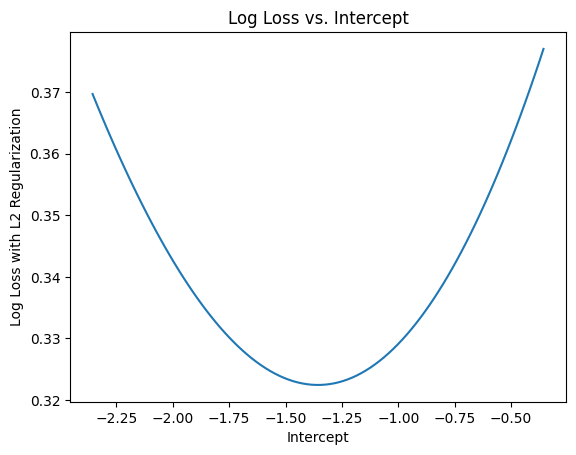

In [313]:
import matplotlib.pyplot as plt # type: ignore
import math

intercept = float(clf0.intercept_[0])

loss = []
intercept_range = np.linspace(intercept - 1, intercept + 1, 100)
for i in intercept_range:
    loss.append(lr_logloss(adult50kp['x_subtrain'], adult50kp['y_subtrain'], i, clf0.coef_[0], 1000))
    
plt.plot(intercept_range, loss)
plt.xlabel('Intercept')

plt.ylabel('Log Loss with L2 Regularization')
plt.title('Log Loss vs. Intercept')
plt.show()


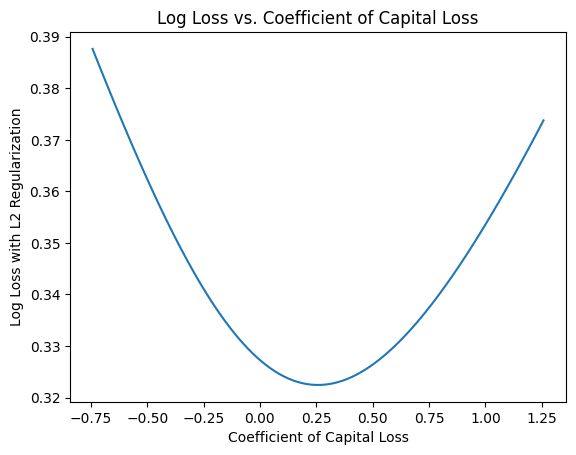

In [314]:
loss = []
coef_range = np.linspace(clf0.coef_[0][0] - 1, clf0.coef_[0][0] + 1, 100)
for i in coef_range:
    coeff = clf0.coef_[0]
    coeff[0] = i
    loss.append(lr_logloss(adult50kp['x_subtrain'], adult50kp['y_subtrain'], intercept, coeff, 1000))
    
plt.plot(coef_range, loss)
plt.xlabel('Coefficient of Capital Loss')
plt.ylabel('Log Loss with L2 Regularization')
plt.title('Log Loss vs. Coefficient of Capital Loss')
plt.show()

#### Sanity Check

為了幫助同學們自我檢測正確性，在這裡提供幾個關鍵步驟的參考結果。

**第一小題**
```python
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

X = adult50kp['x_subtrain'][0:5,]
intercept = -1.5272275
coefs = [0.25950781,  0.34876602,  2.31873776 , 0.78736064,  0.33992389,  0.08704992,
  -0.43884149,  0.06617491, -0.86784172, -1.14138298, -0.0430126,   0.89943298,
  -0.91920029,  0.11168262, -0.20330975, -0.45255335, -0.06209014, -1.1973518,
  -0.32811911,  0.15581135,  0.23931349,  0.97771987, -0.80849467, -0.48881008,
  -0.05761483, -0.61597391, -3.01467409,  0.67615709,  0.82684249,  0.45561501,
   0.78515056,  0.10471469,  0.03536166, -0.18042056, -0.1981496,   0.89739856,
   0.72133736,  0.19974049,  0.02431812, -0.54957554, -0.23797782, -0.19134163,
  -0.08962951, -0.13136345, -0.14984098, -1.82034863,  0.22178759, -0.07676697,
   1.5654472,   0.4801181,  -0.45519986, -2.16013255,  0.56715199, -1.36568413,
  -0.26013768, -0.34160994,  0.30455591,  0.98946547,  0.83849021, -0.55428539,
  -0.01931975,  0.02875685, -0.22012367,  0.165938,    0.24587743, -0.49584621,
   0.27129184,  0.6632467,   1.08311314,  0.355352,    0.23657114, -0.55244221,
  -0.29776791, -0.51492492, -1.08493494, -0.83233382,  0.61660701,  0.38077523,
   0.34522743,  0.10493796,  0.16957889, -0.91882431, -0.07844291, -0.12138313,
  -0.13627414,  0.437241,   -1.40284695,  0.43730002,  0.64656827, -0.12873123,
   0.12363191,  0.30820418, -0.37598606, -0.2384826,  -1.86067539, -0.92314978,
   2.17438484,  1.28232608, -1.05960696, -1.35676708, -0.99932736, -0.64333065]

coefs = np.array(coefs)
coefs = coefs.reshape((-1, 1))
pred_prob(X, intercept, coefs)
```
Output:
```
array([[0.85699649, 0.14300351],
       [0.84396404, 0.15603596],
       [0.54792834, 0.45207166],
       [0.99604068, 0.00395932],
       [0.91956486, 0.08043514]])
```


In [315]:
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

X = adult50kp['x_subtrain'][0:5,]
intercept = -1.5272275
coefs = [0.25950781,  0.34876602,  2.31873776 , 0.78736064,  0.33992389,  0.08704992,
  -0.43884149,  0.06617491, -0.86784172, -1.14138298, -0.0430126,   0.89943298,
  -0.91920029,  0.11168262, -0.20330975, -0.45255335, -0.06209014, -1.1973518,
  -0.32811911,  0.15581135,  0.23931349,  0.97771987, -0.80849467, -0.48881008,
  -0.05761483, -0.61597391, -3.01467409,  0.67615709,  0.82684249,  0.45561501,
   0.78515056,  0.10471469,  0.03536166, -0.18042056, -0.1981496,   0.89739856,
   0.72133736,  0.19974049,  0.02431812, -0.54957554, -0.23797782, -0.19134163,
  -0.08962951, -0.13136345, -0.14984098, -1.82034863,  0.22178759, -0.07676697,
   1.5654472,   0.4801181,  -0.45519986, -2.16013255,  0.56715199, -1.36568413,
  -0.26013768, -0.34160994,  0.30455591,  0.98946547,  0.83849021, -0.55428539,
  -0.01931975,  0.02875685, -0.22012367,  0.165938,    0.24587743, -0.49584621,
   0.27129184,  0.6632467,   1.08311314,  0.355352,    0.23657114, -0.55244221,
  -0.29776791, -0.51492492, -1.08493494, -0.83233382,  0.61660701,  0.38077523,
   0.34522743,  0.10493796,  0.16957889, -0.91882431, -0.07844291, -0.12138313,
  -0.13627414,  0.437241,   -1.40284695,  0.43730002,  0.64656827, -0.12873123,
   0.12363191,  0.30820418, -0.37598606, -0.2384826,  -1.86067539, -0.92314978,
   2.17438484,  1.28232608, -1.05960696, -1.35676708, -0.99932736, -0.64333065]

coefs = np.array(coefs)
coefs = coefs.reshape((-1, 1))
pred_prob(X, intercept, coefs)

array([[0.85699649, 0.14300351],
       [0.84396404, 0.15603596],
       [0.54792834, 0.45207166],
       [0.99604068, 0.00395932],
       [0.91956486, 0.08043514]])

**第二小題**

```python
Xtrain = adult50kp['x_subtrain']
ytrain = adult50kp['y_subtrain']
lr_logloss(Xtrain, ytrain, intercept, coefs, 1000)
```

Output:
```
0.32275140356935755
```

In [316]:
Xtrain = adult50kp['x_subtrain']
ytrain = adult50kp['y_subtrain']
print(lr_logloss(Xtrain, ytrain, intercept, coefs, 1000))

0.3227514035693576


有關第二小題的 Sanity Check:

我的實作所算出來的答案為 0.3227514035693576，與正確答案有一個非常微小的小數點後第16位的差異，我認為是因為實作的方式或硬體關係造成浮點數計算精度不同，但答案應是正確的。

---

### 第二題 [Chi-Squared Feature Selection] 

注意:
* 本題應以Numpy實做，禁用現成的Chi-squared Feature Selection函數如sklearn.feature_selection.chi2()或scipy.stats.chisquare()或scipy.stats.chisquare()或scipy.stats.chi2_contingency()
* sklearn.feature_selection.chi2() 實做的方式不是標準的Chi-squared test (cf. <https://github.com/scikit-learn/scikit-learn/blob/d5082d32d/sklearn/feature_selection/_univariate_selection.py#L195>)。本題要求你依照課程投影片的說明以標準的Chi-squared test方式實做。如果你的結果與 sklearn.feature_selection.chi2()是正常的。


(30%) 在Univariate Feature Selection的情境下實做Chi-Squared Feature Selection Method。

請使用下面Python函數定義:


```python
def my_chi2_fs(X, y):
    # Compute chi-squared statistics for each columns in X
    # X: pandas DataFrame; y: numpy array
    # return: numpy array with chi-squared statistics  
```

為了方便批改與除錯，請將你的實做套用到mbav1.pickle的資料集中。資料集載入方式如下:

```python
import pandas as pd
import pickle
import numpy as np
dsfile = "mbav1.pickle"
with open(dsfile, "rb") as fh1:
    mba = pickle.load(fh1)

catcol = mba['x_train'].select_dtypes('object').columns
print("categorical columns:", catcol)
x_traincat = mba['x_train'][catcol].copy()
```

實做好的my_chi2_fs()應該有下面的行為:

```python
chi2vec = my_chi2_fs(x_traincat, mba['y_train'])
for i, acol in enumerate(x_traincat.columns):
    print(f"{acol:20s} {chi2vec[i]:.4f}")
```

Output

```
gender               0.1106
major                4.1315
race                 0.9505
work_industry        16.3957
```


In [317]:
import pandas as pd # type: ignore

dsfile = "mbav1.pickle"
with open(dsfile, "rb") as fh1:
    mba = pickle.load(fh1)

catcol = mba['x_train'].select_dtypes('object').columns
print("categorical columns:", catcol)
x_traincat = mba['x_train'][catcol].copy()

categorical columns: Index(['gender', 'major', 'race', 'work_industry'], dtype='object')


In [318]:
x_traincat

,gender,major,race,work_industry
4099,Female,Business,Unknown,Nonprofit/Gov
1339,Female,Humanities,Asian,Investment Banking
5723,Female,STEM,White,PE/VC
789,Female,Humanities,Unknown,Nonprofit/Gov
3443,Female,Humanities,White,Consulting
...,...,...,...,...
318,Female,Humanities,White,Consulting
850,Male,STEM,White,Technology
5134,Male,Humanities,Hispanic,Consulting
2010,Male,STEM,White,Other


#### Problem 2

Answer: 我根據投影片中公式，實作 Chi-Square Feature Selection。Output 如下：
- gender               0.1106
- major                4.1315
- race                 0.9505
- work_industry        16.3957

與助教提供的 Sanity Check 符合。

In [319]:
def my_chi2_fs(X, y):
    # Compute chi-squared statistics for each columns in X
    # X: pandas DataFrame; y: numpy array
    # return: numpy array with chi-squared statistics
    # don't use chi2 function from sklearn
    chi2_stats = []
    for i in X.columns:
        observed = pd.crosstab(X[i], y)
        observed = observed.values        
        expected = np.zeros(observed.shape)
        for j in range(observed.shape[0]):
            for k in range(observed.shape[1]):
                expected[j, k] = np.sum(observed[j, :]) * np.sum(observed[:, k]) / np.sum(observed)
        chi2_stat = np.sum((observed - expected) ** 2 / expected)
        chi2_stats.append(chi2_stat)
    return np.array(chi2_stats)

In [320]:
chi2vec = my_chi2_fs(x_traincat, mba['y_train'])
for i, acol in enumerate(x_traincat.columns):
    print(f"{acol:20s} {chi2vec[i]:.4f}")

gender               0.1106
major                4.1315
race                 0.9505
work_industry        16.3957


### 第三題 [Forward Feature Selection] 

注意: 本題禁用現成的Feature Selection Pipeline, 如sklearn.feature_selection.SelectFromModel()

(25%) Forward Feature Selection是一個常見的Model-based Feature Selection Method。方法在概念上單純，但在實做上各異。我們在這裡練習一個使用Train-Valid-Test Split的Forward Feature Selection作法。這個作法使用Validation Set決定要把那個Feature加入。並在Validation Set的Performance不再進步時即停止整個程序。

較詳細的作法如下:

* Let 𝑀_0 denote the null model (no predictors); M_k = the model with k predictors (i.e., features); p = number of features
* For Step k=0, 1, 2, …, 𝑝−1:
    * Consider all p - k models that augment the predictors in 𝑀_k with one additional predictor. For each possibility; compute the prediction performance (F1 score) on the validation set and select one with the best performance.
    * Stop if the best validation performance no longer increase.

本題的資料集由pickle file載入 (A Dictionary):
```python
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

```

* training set keys: x_subtrain, y_subtrain
* validation set keys: x_subvalid, y_subvalid
* test set keys: x_test, y_test

為了方便比較，請使用下面的 LR Learner: sklearn.linear_model.LogisticRegression(solver = 'lbfgs', C= 1000, max_iter = 1000, tol=1e-5)

(1) (5%) 總共有多少Features, 多少Training, Validation, Test Data?

(2) (5%) 在Training Set上訓練，並在Validation Set與Test Set上計算F1 Score。

(3) (15%) 使用上面的Forward Feature Selection作法，依序報告被選取的特徵與其Validation F1 Score與最後所有被選取的特徵的Test F1 Score。與(2)比較並討論。


#### Problem 3-(1)
(5%) 總共有多少Features, 多少Training, Validation, Test Data?

Answer: 讀入資料後，我得到了以下數據：
- Features: 102 個
- Training data: 27000 筆
- Validation data: 3162 筆
- Test data: 15060 筆


In [321]:
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [322]:
feature_names = adult50kp['columnname']
Xtrain = adult50kp['x_subtrain']
ytrain = adult50kp['y_subtrain']
Xvalid = adult50kp['x_subvalid']
yvalid = adult50kp['y_subvalid']
Xtest = adult50kp['x_test']
ytest = adult50kp['y_test']

In [323]:
#(1) (5%) 總共有多少Features, 多少Training, Validation, Test Data?
print(f"Features: {Xtrain.shape[1]}")
print(f"Training Data: {Xtrain.shape[0]}")
print(f"Validation Data: {Xvalid.shape[0]}")
print(f"Test Data: {Xtest.shape[0]}")

Features: 102
Training Data: 27000
Validation Data: 3162
Test Data: 15060


#### Problem 3-(2)
(5%) 在Training Set上訓練，並在Validation Set與Test Set上計算F1 Score。

Answer: 我運用題目所規定的 Logistic Regression classifier，對 Training Set 進行訓練，並分別在 Validation Set 與 Test Set 預測得到以下的 F1 Score:
- Validation Set: 0.6685
- Test Set: 0.6619

In [324]:
#(2) (5%) 在Training Set上訓練，並在Validation Set與Test Set上計算F1 Score。
from sklearn.metrics import f1_score # type: ignore

clf1 = LogisticRegression(solver = 'lbfgs', C= 1000, max_iter = 1000, tol=1e-5)
clf1.fit(Xtrain, ytrain)

y_valid_pred = clf1.predict(Xvalid)
y_test_pred = clf1.predict(Xtest)

f1_valid = f1_score(yvalid, y_valid_pred)
f1_test = f1_score(ytest, y_test_pred)

print(f"F1 Score on Validation Set: {f1_valid.round(4)}")
print(f"F1 Score on Test Set: {f1_test.round(4)}")

F1 Score on Validation Set: 0.6685
F1 Score on Test Set: 0.6619


#### Problem 3-(3)
(15%) 使用上面的Forward Feature Selection作法，依序報告被選取的特徵與其Validation F1 Score與最後所有被選取的特徵的Test F1 Score。與(2)比較並討論。

我在實作的時候發現：在某些階段，可能會有多個相同的 New Features 有能力帶來相同的 F1 Score 進步。因此我的實作方式是：在遇到可以選擇的 New Feature 超過一個時，就隨機選擇一個。因為好奇這樣的選法會不會造成最終 F1 Score 結果的不同，因此我跑了 20 次實驗，並且回報最好的 F1 Score 以及其所使用的 Features. 在以下的程式碼中，我已經將實驗次數改成 1，方便助教批改。

我所得到最好的 F1 Score 是 **0.6736**，過程如下：

- Stage 1: Adding feature educational-num, F1: 0.3205
- Stage 2: Adding feature marital-status_Married-civ-spouse, F1: 0.5532
- Stage 3: Adding feature capital-gain, F1: 0.6263
- Stage 4: Adding feature occupation_Exec-managerial, F1: 0.6429
- Stage 5: Adding feature capital-loss, F1: 0.6546
- Stage 6: Adding feature occupation_Other-service, F1: 0.6573
- Stage 7: Adding feature occupation_Machine-op-inspct, F1: 0.6611
- Stage 8: Adding feature occupation_Adm-clerical, F1: 0.6644
- Stage 9: Adding feature native-country_South, F1: 0.6653
- Stage 10: Adding feature occupation_Tech-support, F1: 0.6662
- Stage 11: Adding feature relationship_Own-child, F1: 0.6676
- Stage 12: Adding feature native-country_Jamaica, F1: 0.668
- Stage 13: Adding feature relationship_Other-relative, F1: 0.6685
- Stage 14: Adding feature relationship_Unmarried, F1: 0.669
- Stage 15: Adding feature education_Bachelors, F1: 0.6694
- Stage 16: Adding feature workclass_Self-emp-inc, F1: 0.6703
- Stage 17: Adding feature native-country_Nicaragua, F1: 0.6717
- Stage 18: Adding feature native-country_Vietnam, F1: 0.6722
- Stage 19: Adding feature gender_Female, F1: 0.6722
- Stage 20: Adding feature native-country_Cuba, F1: 0.6731
- Stage 21: Adding feature education_Doctorate, F1: 0.6736

我所使用的所有 Features:
```python
['educational-num',
 'marital-status_Married-civ-spouse',
 'capital-gain',
 'occupation_Exec-managerial',
 'capital-loss',
 'occupation_Other-service',
 'occupation_Machine-op-inspct',
 'occupation_Adm-clerical',
 'native-country_South',
 'occupation_Tech-support',
 'relationship_Own-child',
 'native-country_Jamaica',
 'relationship_Other-relative',
 'relationship_Unmarried',
 'education_Bachelors',
 'workclass_Self-emp-inc',
 'native-country_Nicaragua',
 'native-country_Vietnam',
 'gender_Female',
 'native-country_Cuba',
 'education_Doctorate']
```


第 (2) 題結果如下：
- F1 Score on Validation Set: 0.6685
- F1 Score on Test Set: 0.6619

在使用了 Feature Selection 後：

- F1 Score on Test Set with Best Features: 0.6546
- F1 Score on Validation Set with Best Features: 0.6736

我們發現，在驗證集上，選擇的最佳特徵可能有助於提高模型的準確性。但是模型在測試集上的表現則下降，可能是因為失去了某些重要的特徵。我們可能需要探索不同的特徵選擇方法以提升最終的模型表現。

In [325]:
# Assuming Xtrain, ytrain, Xvalid, yvalid, clf1, and feature_names are already defined
best_experiment_results = {
    "best_features": [],
    "best_features_names": [],
    "f1_scores_per_stage": []
}
highest_f1_achieved = -1

# Run the experiment 20 times, change to 1 here.
for experiment in range(1):
    print(f"\nRunning experiment {experiment + 1}")
    
    best_f1 = -1  # Start with a small value to avoid premature stopping
    selected_features = []
    f1_scores_stage = []  # Store F1 scores at each stage for the current experiment
    
    while True:
        f1_scores = []
        feature_candidates = []  # Track feature indices for this round
        
        # Test each feature not in selected_features
        for i in range(Xtrain.shape[1]):
            if i not in selected_features:
                features = selected_features + [i]
                clf1.fit(Xtrain[:, features], ytrain)
                y_valid_pred = clf1.predict(Xvalid[:, features])
                f1 = f1_score(yvalid, y_valid_pred)
                f1_scores.append(f1)
                feature_candidates.append(i)
        
        # Check if we have scores to compare
        if not f1_scores:
            print("No more features to evaluate.")
            break
        
        # Find the maximum F1 score and corresponding feature without sorting
        max_f1 = max(f1_scores)
        max_indices = [i for i, j in enumerate(f1_scores) if j == max_f1]
        max_index = np.random.choice(max_indices)
        best_feature = feature_candidates[max_index]

        # Update selected features only if there is an improvement
        if max_f1 > best_f1:
            best_f1 = max_f1
            selected_features.append(best_feature)
            f1_scores_stage.append(max_f1)  # Store the F1 score of this stage
            print(f"Adding feature {feature_names[best_feature]} to selected features, F1: {max_f1}")
        else:
            print("No improvement found; stopping feature selection.")
            break
    
    # Check if this experiment had the highest F1 score overall
    if best_f1 > highest_f1_achieved:
        highest_f1_achieved = best_f1
        best_experiment_results["best_features"] = selected_features.copy()
        best_experiment_results["best_features_names"] = [feature_names[i] for i in selected_features]
        best_experiment_results["f1_scores_per_stage"] = f1_scores_stage.copy()

    print(f"Selected Features for Experiment {experiment + 1}: {selected_features}")
    print(f"F1 Scores per Stage for Experiment {experiment + 1}: {f1_scores_stage}")

# Final output of the best result across all experiments
print("\nBest Features Selected Across All Experiments:", best_experiment_results["best_features"])
print("Best Features Names:", best_experiment_results["best_features_names"])
print("F1 Scores at Each Stage for the Best Experiment:", best_experiment_results["f1_scores_per_stage"])



Running experiment 1
Adding feature educational-num to selected features, F1: 0.32052483598875353
Adding feature marital-status_Married-civ-spouse to selected features, F1: 0.553223388305847
Adding feature capital-gain to selected features, F1: 0.6263498920086393
Adding feature occupation_Exec-managerial to selected features, F1: 0.6429070580013976
Adding feature capital-loss to selected features, F1: 0.6545708304256804
Adding feature occupation_Other-service to selected features, F1: 0.657323055360897
Adding feature occupation_Machine-op-inspct to selected features, F1: 0.6610526315789473
Adding feature occupation_Adm-clerical to selected features, F1: 0.6643598615916955
Adding feature native-country_South to selected features, F1: 0.6652806652806653
Adding feature occupation_Tech-support to selected features, F1: 0.6662059433310297
Adding feature relationship_Own-child to selected features, F1: 0.6675862068965517
Adding feature native-country_Jamaica to selected features, F1: 0.6680

In [326]:
#use the best features to train the model
best_features = best_experiment_results["best_features"]
clf1.fit(Xtrain[:, best_features], ytrain)
y_test_pred = clf1.predict(Xtest[:, best_features])
f1_test = f1_score(ytest, y_test_pred)
print(f"F1 Score on Test Set with Best Features: {f1_test.round(4)}")

y_valid_pred = clf1.predict(Xvalid[:, best_features])
f1_valid = f1_score(yvalid, y_valid_pred)
print(f"F1 Score on Validation Set with Best Features: {f1_valid.round(4)}")

F1 Score on Test Set with Best Features: 0.6546
F1 Score on Validation Set with Best Features: 0.6736


In [327]:
[str(i) for i in best_experiment_results["best_features_names"]]

['educational-num',
 'marital-status_Married-civ-spouse',
 'capital-gain',
 'occupation_Exec-managerial',
 'capital-loss',
 'occupation_Other-service',
 'occupation_Machine-op-inspct',
 'occupation_Adm-clerical',
 'native-country_South',
 'occupation_Tech-support',
 'relationship_Own-child',
 'native-country_Jamaica',
 'relationship_Other-relative',
 'relationship_Unmarried',
 'education_Bachelors',
 'workclass_Self-emp-inc',
 'native-country_Nicaragua',
 'native-country_Vietnam',
 'gender_Female',
 'native-country_Cuba',
 'education_Doctorate']

In [328]:
for i in range(len(best_experiment_results["best_features"])):
    print(f"Stage {i + 1}: Adding feature {best_experiment_results['best_features_names'][i]}, F1: {best_experiment_results['f1_scores_per_stage'][i].round(4)}")

Stage 1: Adding feature educational-num, F1: 0.3205
Stage 2: Adding feature marital-status_Married-civ-spouse, F1: 0.5532
Stage 3: Adding feature capital-gain, F1: 0.6263
Stage 4: Adding feature occupation_Exec-managerial, F1: 0.6429
Stage 5: Adding feature capital-loss, F1: 0.6546
Stage 6: Adding feature occupation_Other-service, F1: 0.6573
Stage 7: Adding feature occupation_Machine-op-inspct, F1: 0.6611
Stage 8: Adding feature occupation_Adm-clerical, F1: 0.6644
Stage 9: Adding feature native-country_South, F1: 0.6653
Stage 10: Adding feature occupation_Tech-support, F1: 0.6662
Stage 11: Adding feature relationship_Own-child, F1: 0.6676
Stage 12: Adding feature native-country_Jamaica, F1: 0.668
Stage 13: Adding feature relationship_Other-relative, F1: 0.6685
Stage 14: Adding feature relationship_Unmarried, F1: 0.669
Stage 15: Adding feature education_Bachelors, F1: 0.6694
Stage 16: Adding feature workclass_Self-emp-inc, F1: 0.6703
Stage 17: Adding feature native-country_Nicaragua, F1